# Exploratory Data Analysis - Retail Analysis
## AUTHOR : SAKSHI MAHARANA
#### THE SPARKS FOUNDATION GRIPFEB'21
##### DATA SCIENCE AND BUSINESS ANALYTICS INTERN

TASKS #3:

        ●  Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.
        ●  As a business manager, try to find out the weak areas where you can
        work to make more profit.
        ●  What all business problems you can derive by exploring the data?
        
TASK SUBMISSION RULES :

        1. Create the dashboards and/or storyboard and record it.
        2. Upload the recording either on YouTube or LinkedIn.
        3. Create a LinkedIn post as suggested in FAQs of TSF.
        
DATA GIVEN :

        1. Dataset used from : https://bit.ly/3i4rbWl
        2. One .csv file provided : 'SampleSuperstore.csv'
        3. Tool Used : Python.
              
STEPS TAKEN :

        1. Importing Libraries
        2. Data Sourcing and Understanding
        3. Data Cleaning
        4. Data Pre-processing
        5. Exploratory Data Analysis
        

        
Let's Begin!!!

###### Step 1: Importing Libraries

In [1]:
#importing necessary libraries 

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#basic
import numpy as np
import pandas as pd

#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For converting date and time format
from datetime import datetime

In [2]:
#setting 50 rows & columns to show in the output clearly
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

###### Step 2 : Data Sourcing and Understanding

In [3]:
#loading and reading the csv file here
retail = pd.read_csv(r'\SampleSuperstore.csv')
retail.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


Let's now understand the loaded csv file more clearly.

In [4]:
#shape of dataframe
retail.shape

(9994, 13)

In [5]:
#gathering info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#checking outliers for numeric features
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#seeing all datatypes
retail.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
#seeing all columns
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
#checking for null values
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Insights from Step 2:

    1. The shape of the dataframe => #rows = 9994 and #columns = 13.
    2. There are no null values or missing values in the dataset.
    3. The datatypes are well recognized.

As, we have provided the cleaned dataset, we'll skip step 3 for now.
Moving Forward!

###### Step 4 : Data Pre-processing

We'll first check the value counts for all the categorical columns in the dataset.

In [10]:
#segment values
retail['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
#Ship Mode values
retail['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [12]:
#Country values
retail['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [13]:
#State values
retail['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

In [14]:
#city values
retail['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Billings           1
Goldsboro          1
Yucaipa            1
Orland Park        1
Rogers             1
Name: City, Length: 531, dtype: int64

In [15]:
#Region values
retail['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [16]:
#Category values
retail['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
#Category values
retail['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [18]:
#Quantity values
retail['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

Insights from the value_counts():
    1. The value_counts() of the "Country" is "United States" for all the rows, this means the country column will not help us more in order to explore. Thus, dropping the column "Country".
    2. Also, the column "Postal Code" doesn't give much useful insights, so we can drop it too.

In [19]:
#drop "Country"
retail.drop(['Country', 'Postal Code'], axis=1, inplace=True)

In [20]:
#checking columns now
retail.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
#and checking shape too
retail.shape

(9994, 11)

The dataset is now ready to perform EDA part.

###### Step 5 : Exploratory Data Analysis

This is the main part of the task. Let's see this with the two checkpoints required for analysing the data : 
    
    1. Checkpoint [1] -> As a business manager, try to find out the weak areas where you can
    work to make more profit.
    2. Checkpoint [2] -> What all business problems you can derive by exploring the data?
    
Before proceeding with the checkpoints, let's first analyse the numeric and categorical columns individually.

In [22]:
retail.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

###### Feature Corelation 

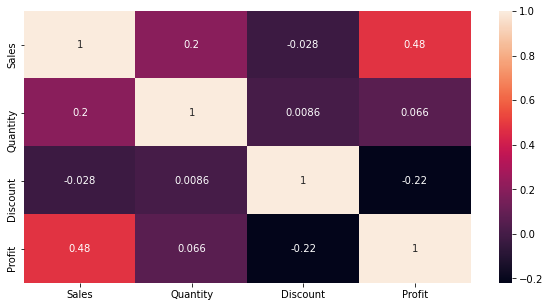

In [23]:
#corelation matrix
plt.figure(figsize=(10, 5), frameon='True')

cor = retail.corr()
sns.heatmap(cor, annot=True)

plt.show()

We can say that Sales Vs Profit relationship is high compartively.

###### Univariate Analysis

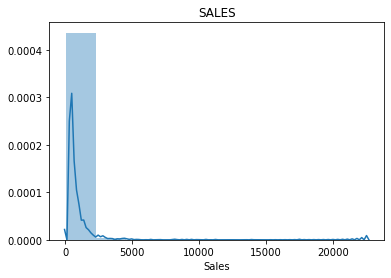

In [24]:
#plotting Sales
plt.title('SALES')

sns.distplot(retail['Sales'], bins=10)
plt.show()

As we can see the plot that the Sales data are completely left skewed, to handle this, we'll use the log transformation in the Sales column and check again.

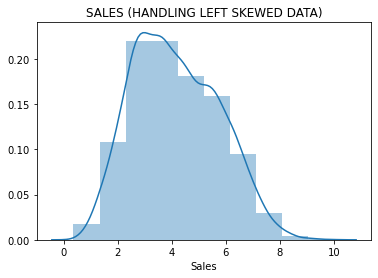

In [25]:
#taking log of the values in both the axes
retail['Sales'] = np.log1p(retail['Sales'])

#plotting again Sales
plt.title('SALES (HANDLING LEFT SKEWED DATA)')
sns.distplot(retail['Sales'], bins=10)
plt.show()

This is much better than the previous plot.

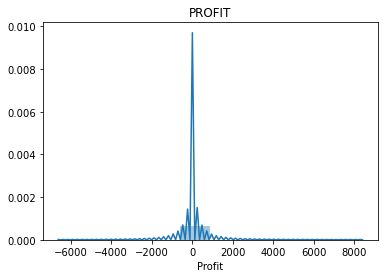

In [26]:
#plotting Profit
plt.title('PROFIT')

sns.distplot(retail['Profit'], bins=10)
plt.show()

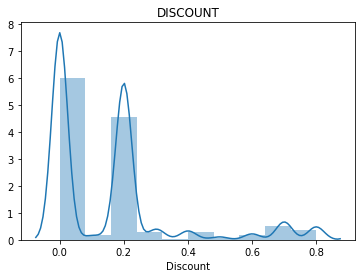

In [27]:
#plotting Discount
plt.title('DISCOUNT')

sns.distplot(retail['Discount'], bins=10)
plt.show()

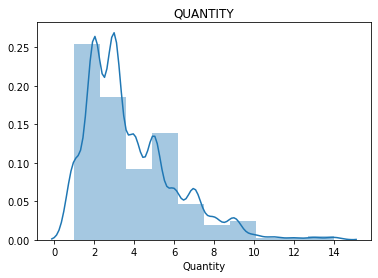

In [28]:
#plotting Quantity
plt.title('QUANTITY')

sns.distplot(retail['Quantity'], bins=10)
plt.show()

###### Bivariate Analysis

###### Features VS Profit

In [29]:
def profit_vs(feature):
    
    print("Profit VS {}".format(feature))
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    X = retail[feature]
    Y = retail['Profit']
    
    sns.barplot(x=X, y=Y, data=retail, estimator=np.sum, ci=0)
    plt.xticks(rotation=90)
    
    #labeling the y-axis
    plt.ylabel('Profit')
    
    #labeling the x-axis
    plt.xlabel('Feature')

    #naming its title
    plt.title("How profitable is this feature")

In [30]:
#SUB-CATEGORY VS PROFIT
grp_plt1 = retail.groupby('Sub-Category')
plt1 = pd.DataFrame(grp_plt1['Profit'].sum())

plt1_sort = plt1.sort_values('Profit',ascending=False)
top10_profitable_subcategory = plt1_sort.head(10)
top10_profitable_subcategory

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


In [31]:
top10_non_profitale_subcategory = plt1_sort.tail(10)
top10_non_profitale_subcategory

,Profit
Sub-Category,
Appliances,18138.0054
Furnishings,13059.1436
Envelopes,6964.1767
Art,6527.7870
Labels,5546.2540
Machines,3384.7569
Fasteners,949.5182
Supplies,-1189.0995
Bookcases,-3472.5560


Profit VS Sub-Category


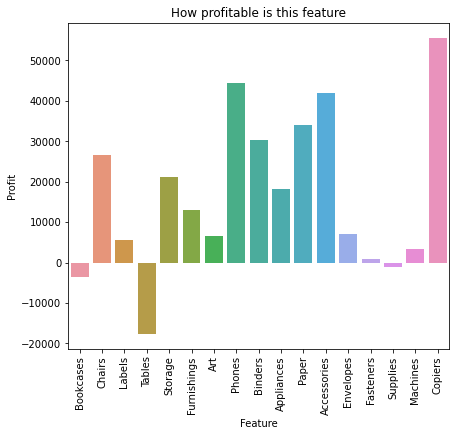

In [32]:
#Sub-Category
profit_vs('Sub-Category')

Insights: 
    1. Highly Profitable Sub-Category : COPIERS
    2. Highly Non-Profitable Sub-Category : TABLES

In [33]:
#CATEGORY VS PROFIT
grp_plt2 = retail.groupby('Category')
plt2 = pd.DataFrame(grp_plt2['Profit'].sum())
plt2

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


Profit VS Category


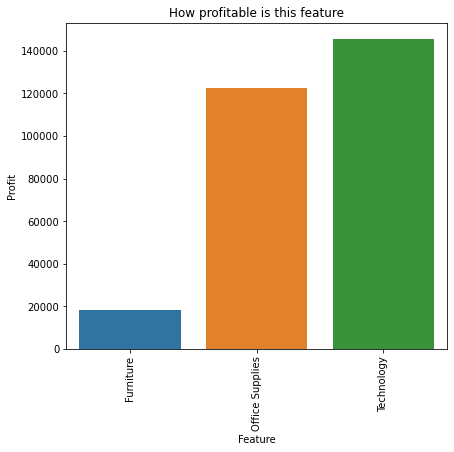

In [34]:
#Category
profit_vs('Category')

Insights:
    1. Highly Profitable Category : TECHNOLOGY
    2. Highly Non-Profitable Category : FURNITURE

Profit VS Segment


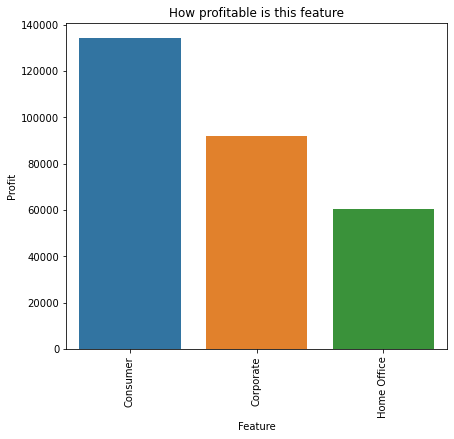

In [35]:
#SEGMENT
profit_vs('Segment')

Insights :
    1. Highly Profitable Segment : HOME OFFICE
    2. Highly Non-Profitable Segment : CONSUMER

Profit VS Ship Mode


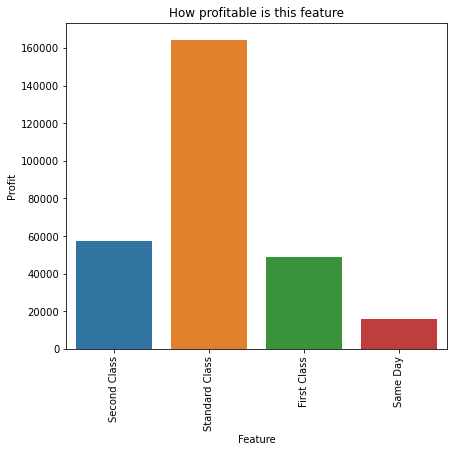

In [36]:
#SHIP MODE
profit_vs('Ship Mode')

Insights :
    1. Highly Profitable Ship Mode : FIRST CLASS
    2. Highly Non-Profitable Ship Mode : STANDARD CLASS

In [37]:
#CITY VS PROFIT
grp_plt3 = retail.groupby('City')
plt3 = pd.DataFrame(grp_plt3['Profit'].sum())

plt3_sort = plt3.sort_values('Profit',ascending=False)
top10_profitable_city = plt3_sort.head(10)
top10_profitable_city

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


In [38]:
top10_non_profitable_city = plt3_sort.tail(10)
top10_non_profitable_city

,Profit
City,
Jacksonville,-2323.8350
Aurora,-2691.7386
Phoenix,-2790.8832
Dallas,-2846.5257
Burlington,-3622.8772
Chicago,-6654.5688
Lancaster,-7239.0684
San Antonio,-7299.0502
Houston,-10153.5485


In [39]:
#STATE VS PROFIT
grp_plt4 = retail.groupby('State')
plt4 = pd.DataFrame(grp_plt4['Profit'].sum())

plt4_sort = plt4.sort_values('Profit',ascending=False)
top10_profitable_state = plt4_sort.head(10)
top10_profitable_state

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


In [40]:
top10_non_profitable_state = plt4_sort.tail(10)
top10_non_profitable_state

,Profit
State,
Oregon,-1190.4705
Florida,-3399.3017
Arizona,-3427.9246
Tennessee,-5341.6936
Colorado,-6527.8579
North Carolina,-7490.9122
Illinois,-12607.8870
Pennsylvania,-15559.9603
Ohio,-16971.3766


Profit VS State


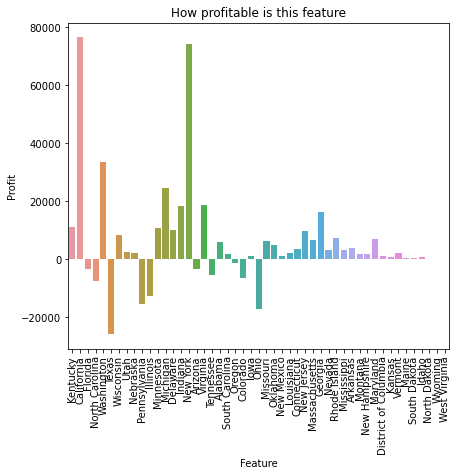

In [41]:
#STATE
profit_vs('State')

Profit VS Region


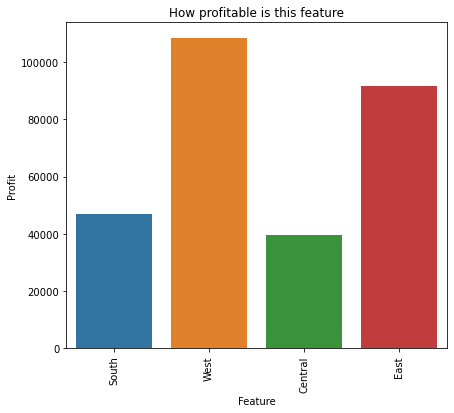

In [42]:
#REGION
profit_vs('Region')

Insights :
    1. Highly Profitable Region : WEST
    2. Highly Non-Profitable Region : CENTRAL

###### Features VS Sales

In [43]:
def sales_vs(feature):
    
    print("Sales VS {}".format(feature))
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    X = retail[feature]
    Y = retail['Sales']
    
    sns.barplot(x=X, y=Y, data=retail, estimator=np.sum, ci=0)
    plt.xticks(rotation=90)
    
    #labeling the y-axis
    plt.ylabel('Sales')
    
    #labeling the x-axis
    plt.xlabel('Feature')

    #naming its title
    plt.title("How Sales related to this Feature")

In [44]:
#SUB-CATEGORY VS SALES
grp_plt4 = retail.groupby('Sub-Category')
plt4 = pd.DataFrame(grp_plt4['Sales'].sum())

plt4_sort = plt4.sort_values('Sales',ascending=False)
top10_highsales_subcategory = plt4_sort.head(10)
top10_highsales_subcategory

,Sales
Sub-Category,
Binders,4924.761482
Paper,4796.095224
Phones,4671.562352
Storage,4086.679496
Furnishings,3689.743728
Accessories,3627.617713
Chairs,3621.565867
Art,2343.450054
Appliances,2099.125936


Sales VS Sub-Category


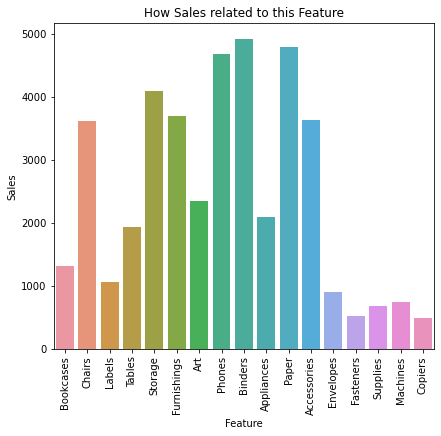

In [45]:
#SUB-CATEGORY
sales_vs('Sub-Category')

Insights :
    1. Highly Profitable Segment : COPIERS
    2. Highly Non-Profitable Segment : FASTENERS

Sales VS Category


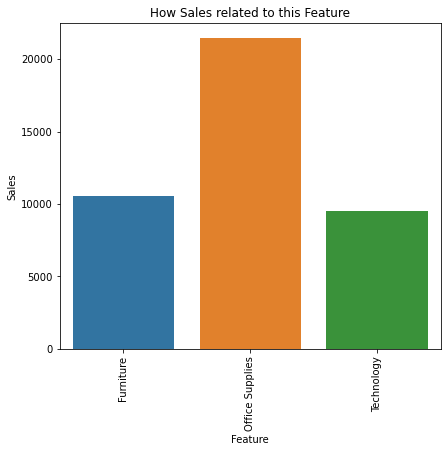

In [46]:
#CATEGORY
sales_vs('Category')

Insights :
    1. Highly Profitable Category : TECHNOLOGY
    2. Highly Non-Profitable Category : OFFICE SUPPLIES

Sales VS Ship Mode


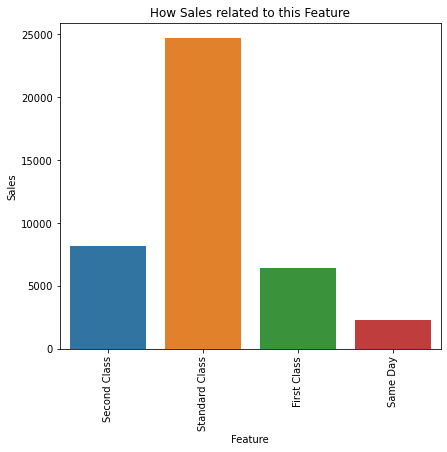

In [47]:
#SHIP MODE
sales_vs('Ship Mode')

Sales VS Segment


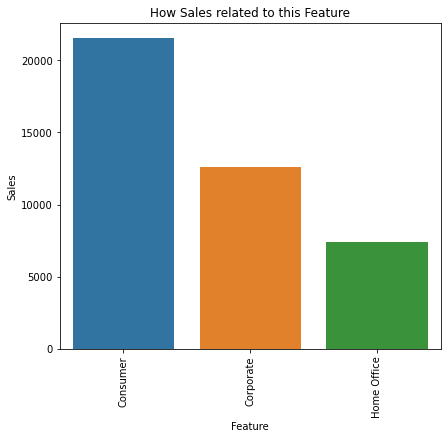

In [48]:
#SEGMENT
sales_vs('Segment')

In [49]:
#CITY VS SALES
grp_plt5 = retail.groupby('City')
plt5 = pd.DataFrame(grp_plt5['Sales'].sum())

plt5_sort = plt5.sort_values('Sales',ascending=False)
top10_highsales_city = plt5_sort.head(10)
top10_highsales_city

,Sales
City,
New York City,3949.294628
Los Angeles,3229.800302
San Francisco,2113.609442
Philadelphia,2109.797251
Seattle,1849.735386
Houston,1440.979015
Chicago,1164.526797
Columbus,900.981247
San Diego,771.127026


In [50]:
top10_lowsales_city = plt5_sort.tail(10)
top10_lowsales_city

,Sales
City,
Missouri City,1.997418
Keller,1.945910
Layton,1.785070
Springdale,1.667707
San Luis Obispo,1.530395
Ormond Beach,1.337104
Pensacola,1.167516
Jupiter,1.119721
Elyria,1.038154


In [51]:
#State VS SALES
grp_plt6 = retail.groupby('State')
plt6 = pd.DataFrame(grp_plt6['Sales'].sum())

plt6_sort = plt6.sort_values('Sales',ascending=False)
top10_highsales_state = plt6_sort.head(10)
top10_highsales_state

,Sales
State,
California,8549.304329
New York,4860.263270
Texas,3745.626265
Pennsylvania,2308.184766
Washington,2187.318560
Illinois,1881.396457
Ohio,1841.159787
Florida,1490.400596
Michigan,1137.937474


In [52]:
top10_lowsales_state = plt6_sort.tail(10)
top10_lowsales_state

,Sales
State,
Kansas,99.265107
Idaho,92.412953
Montana,66.338076
Vermont,56.022351
South Dakota,45.026215
District of Columbia,40.213135
Maine,36.422006
North Dakota,24.524138
West Virginia,19.023676


Sales VS State


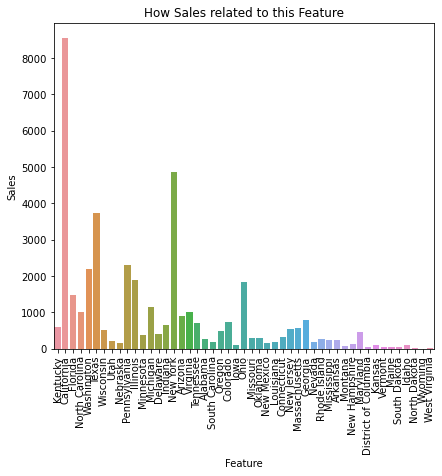

In [53]:
#State
sales_vs('State')

Sales VS Region


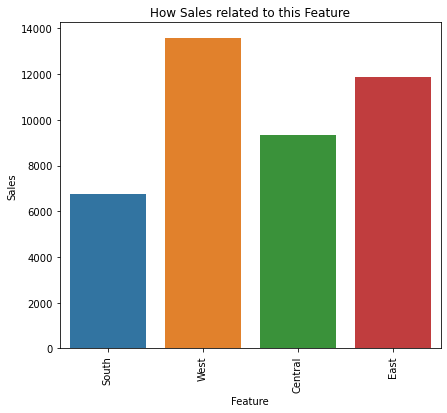

In [54]:
#Region
sales_vs('Region')

###### Multivariate Analysis

In [55]:
def sales_related_to(col2, col3):
    
    print("Sales VS {} VS {}".format(col2, col3))
    
    fig, ax = plt.subplots(figsize=(15,6))
    
    X = retail['Sales']
    Y = retail[col2]
    H = retail[col3]
    
    sns.barplot(x=X, y=Y, hue=H, ax=ax, data=retail, estimator=np.sum, ci=0)
    plt.xticks(rotation=90)
    
    #labeling the y-axis
    y_lab = "{}".format(col2)
    plt.ylabel(y_lab)
    
    #labeling the x-axis
    plt.xlabel('Sales')

    #naming its title
    plt.title("Sales Relationship Plot")

Sales VS Sub-Category VS Region


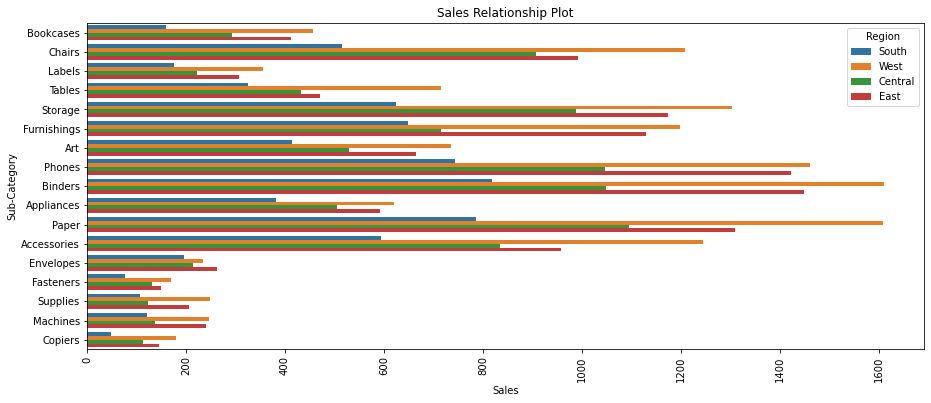

In [56]:
sales_related_to('Sub-Category', 'Region')

Sales VS Category VS Region


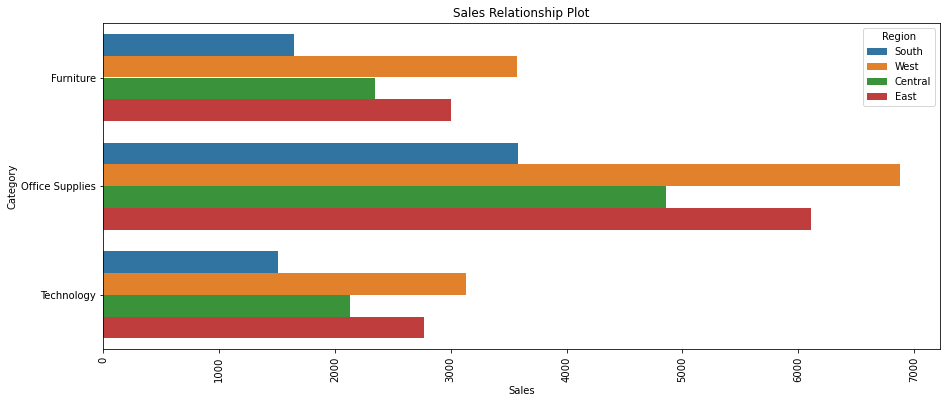

In [57]:
sales_related_to('Category', 'Region')

Sales VS Segment VS Region


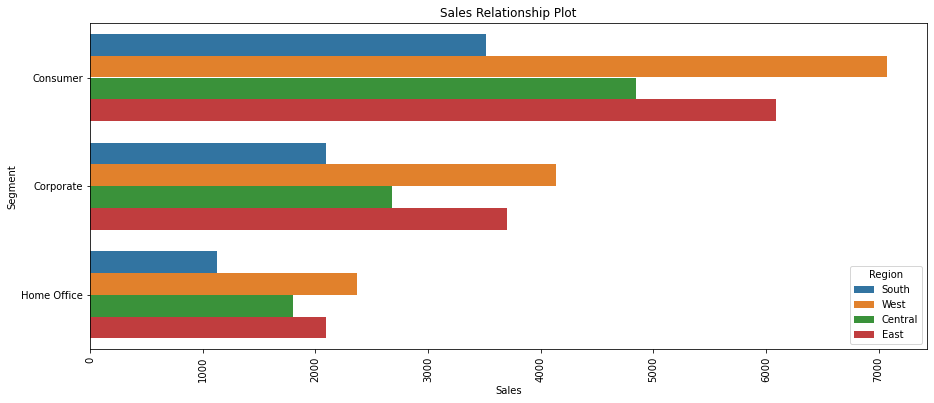

In [58]:
sales_related_to('Segment', 'Region')

Sales VS Ship Mode VS Category


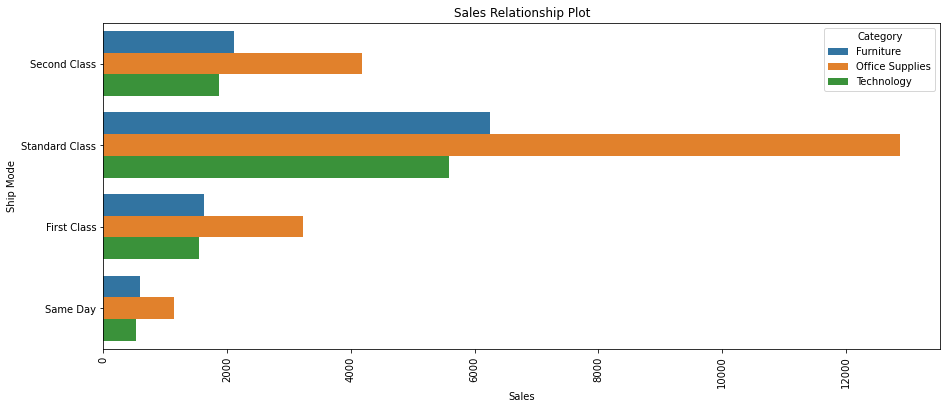

In [59]:
sales_related_to('Ship Mode', 'Category')

Sales VS Segment VS Category


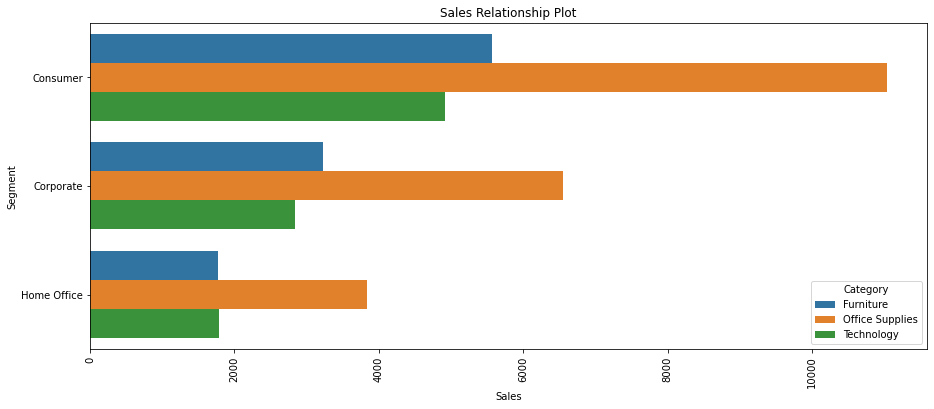

In [60]:
sales_related_to('Segment', 'Category')

Sales VS Sub-Category VS Segment


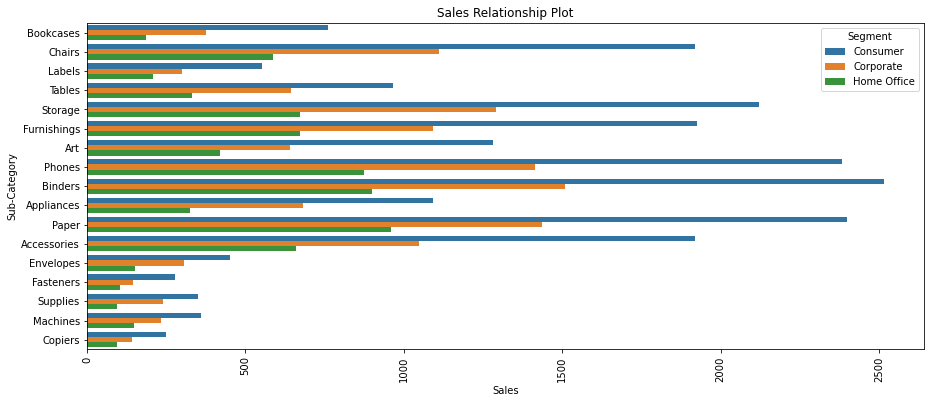

In [61]:
sales_related_to('Sub-Category', 'Segment')

Sales VS Sub-Category VS Ship Mode


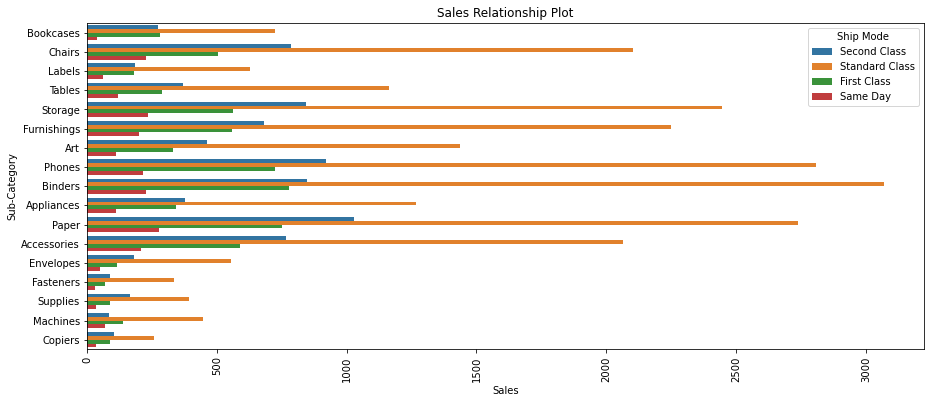

In [62]:
sales_related_to('Sub-Category', 'Ship Mode')

#### A) Checkpoint [1] -> As a business manager, try to find out the weak areas where you can work to make more profit.

STATES

In [63]:
#STATE VS PROFIT
top10_profitable_state

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


In [64]:
#STATE VS SALES
top10_highsales_state

,Sales
State,
California,8549.304329
New York,4860.263270
Texas,3745.626265
Pennsylvania,2308.184766
Washington,2187.318560
Illinois,1881.396457
Ohio,1841.159787
Florida,1490.400596
Michigan,1137.937474


CITIES

In [65]:
#CITY VS PROFIT
top10_profitable_city

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


In [66]:
#CITY VS SALES
top10_highsales_city

,Sales
City,
New York City,3949.294628
Los Angeles,3229.800302
San Francisco,2113.609442
Philadelphia,2109.797251
Seattle,1849.735386
Houston,1440.979015
Chicago,1164.526797
Columbus,900.981247
San Diego,771.127026


PROFITABLE FEATURES

In [67]:
def profit_related_to(col2, col3):
    
    print("Profit VS {} VS {}".format(col2, col3))
    
    fig, ax = plt.subplots(figsize=(15,6))
    
    X = retail['Profit']
    Y = retail[col2]
    H = retail[col3]
    
    sns.barplot(x=X, y=Y, hue=H, ax=ax, data=retail, estimator=np.sum, ci=0)
    plt.xticks(rotation=90)
    
    #labeling the y-axis
    y_lab = "{}".format(col2)
    plt.ylabel(y_lab)
    
    #labeling the x-axis
    plt.xlabel('Profit')

    #naming its title
    plt.title("Profit Relationship Plot")

Profit VS Sub-Category VS Region


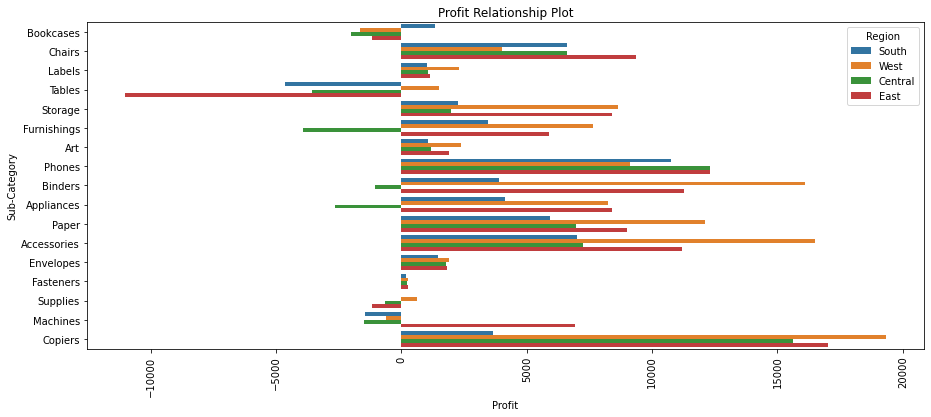

In [68]:
profit_related_to('Sub-Category', 'Region')

Profit VS Category VS Region


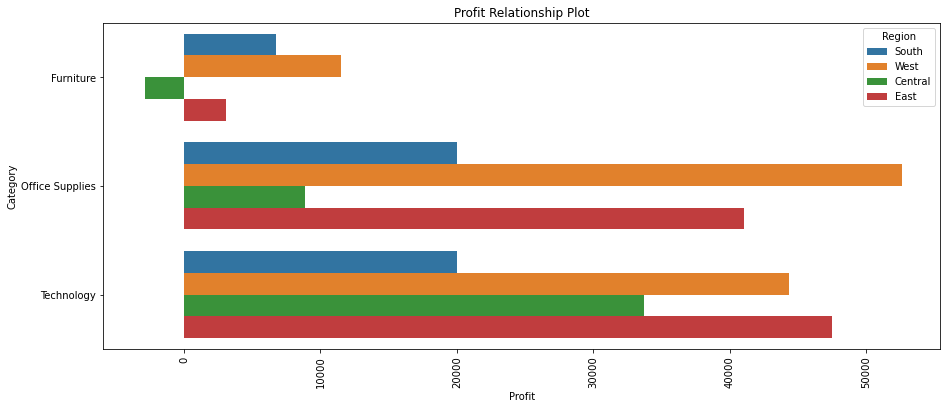

In [69]:
profit_related_to('Category', 'Region')

Profit VS Segment VS Region


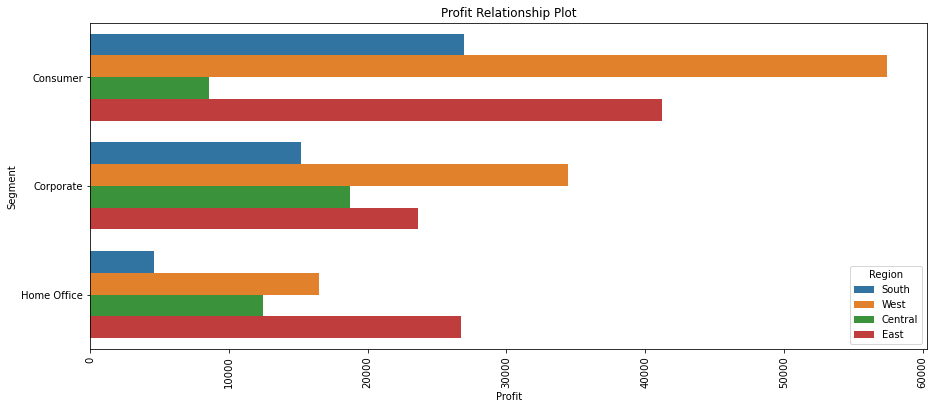

In [70]:
profit_related_to('Segment', 'Region')

Profit VS Ship Mode VS Category


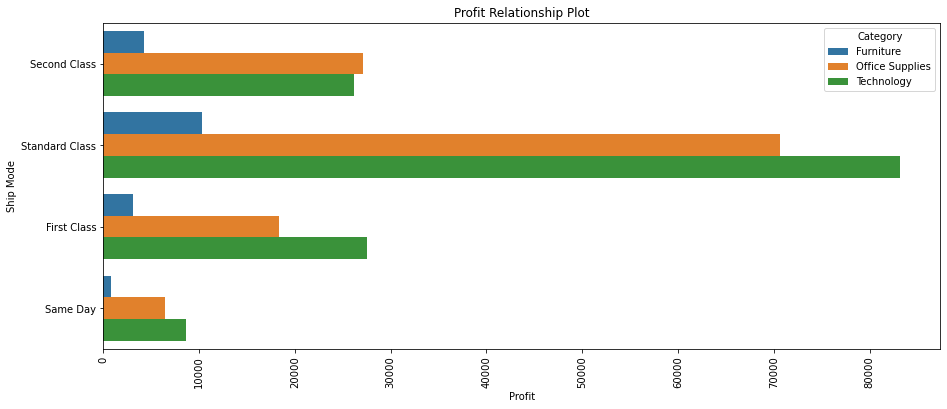

In [71]:
profit_related_to('Ship Mode', 'Category')

Profit VS Ship Mode VS Region


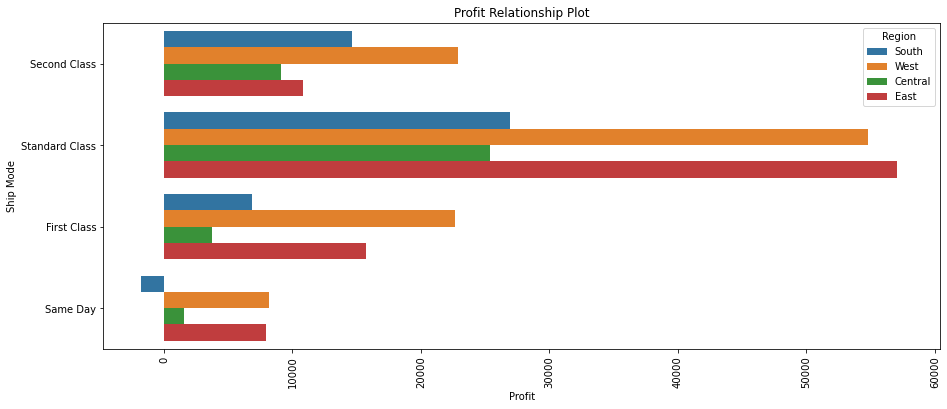

In [72]:
profit_related_to('Ship Mode', 'Region')

Profit VS Segment VS Category


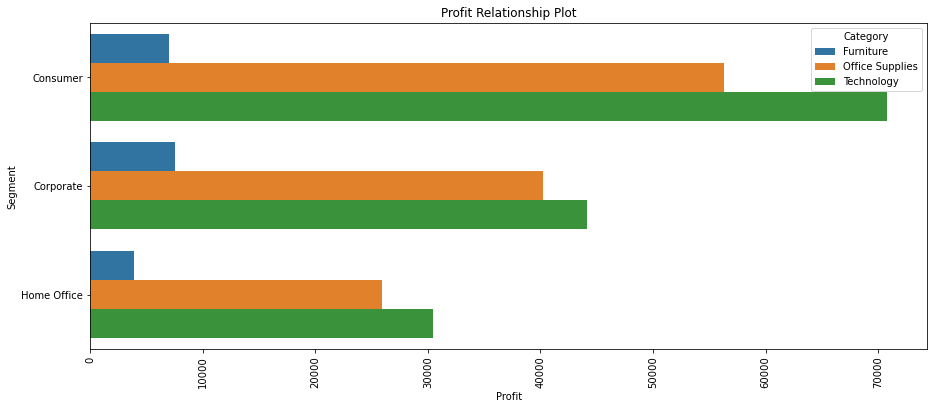

In [73]:
profit_related_to('Segment', 'Category')

Profit VS Sub-Category VS Ship Mode


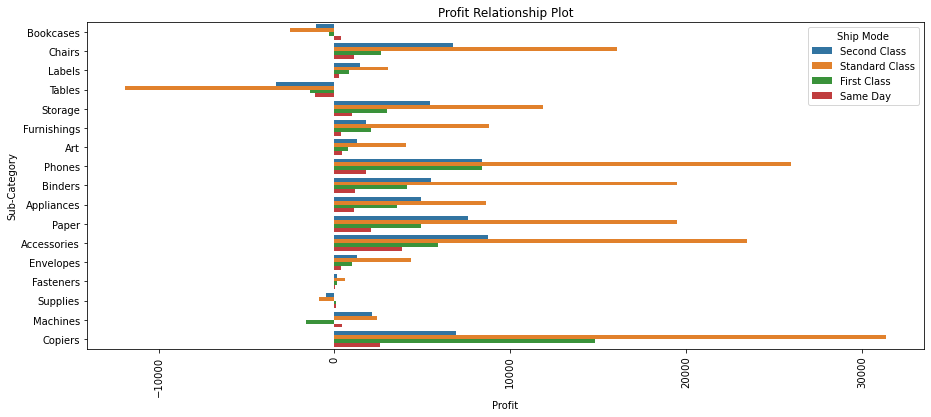

In [74]:
profit_related_to('Sub-Category', 'Ship Mode')

Profit VS Sub-Category VS Segment


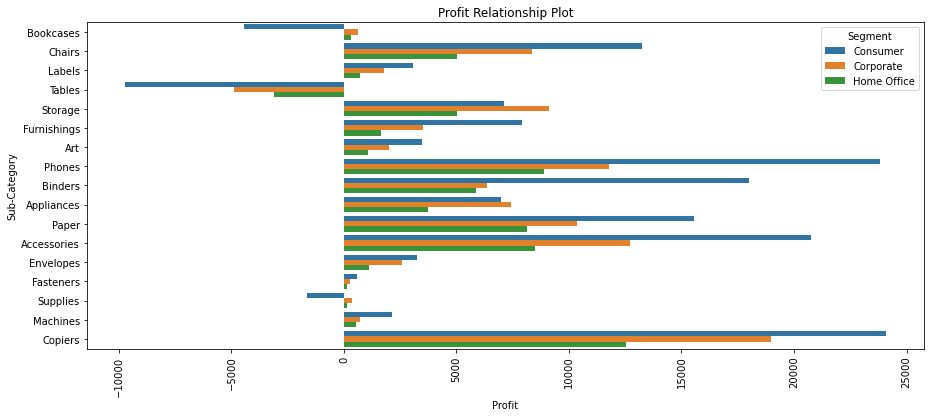

In [75]:
profit_related_to('Sub-Category', 'Segment')

###### Insights from EDA performed for Checkpoint 1: 

Following are the profitable areas - 
    
    1. Highly Profitable Cities are = New York City, Los Angeles, Seattle, San Francisco and San Diego
    2. Highly Profitable States are = California, New York, Washington and Michigan
    3. Highly Profitable Category - Technology
    4. Highly Profitable Sub-Category - Copiers
    5. Highly Profitable Segment - Consumer
    6. Highly Profitable Region - West
    7. Highly Profitable Ship Mode - Standard Class

Following are the work areas where we can work to make more profit -

        1. Increase the Sales in the East and Central region for Copiers as they make profit.
        2. Build the production in the Home Office and Corporate segments to make high profit.
        3. For better profit based on the sub-categories, First class ship mode is helpful.
        4. We should make high sales on the states like Virginia, Indiana, and Georgia, because these states can provide high profit.
        5. We can make profit by Technology category in the West and East regions.
        6. Increase the sales in consumer segments for phones and accessories.
        7. Increase the sales in standard class for phones, binders, papers and accessories.
        8. If standard class is preferred then increase the sales in the south and central region.
        9. Increase the technology growth in the south region for better growth too.
        10. Reduced the sales of chairs, storage and furnishings as they won't help in profit growth.

#### B) Checkpoint [2] -> What all business problems you can derive by exploring the data?

Following are the business problems derived by exploring the data -

        1. Machines, Tables, Bookcases and Chairs provide high sales but they make less profit in the business.
        2. Central region has very low profit but the sales for this region is as high as the West region (which is highly profitable region)
        3. Furniture category has large number of sales, nearly equal to the sales of that of Technology, but it makes less profit.

Now, let's see what problems occured in States and Cities with respect to Profit and Sales.

In [76]:
print("#STATE VS PROFIT")
print(top10_profitable_state)
print('\n')
print("#STATE VS SALES")
print(top10_highsales_state)

#STATE VS PROFIT
                Profit
State                 
California  76381.3871
New York    74038.5486
Washington  33402.6517
Michigan    24463.1876
Virginia    18597.9504
Indiana     18382.9363
Georgia     16250.0433
Kentucky    11199.6966
Minnesota   10823.1874
Delaware     9977.3748


#STATE VS SALES
                      Sales
State                      
California      8549.304329
New York        4860.263270
Texas           3745.626265
Pennsylvania    2308.184766
Washington      2187.318560
Illinois        1881.396457
Ohio            1841.159787
Florida         1490.400596
Michigan        1137.937474
North Carolina  1006.727781


Insights :
    1. States like Texas, Pennsylvania and few more provide large amount of sales but when comes to profit they are nowhere.
    2. States like Virginia, Indiana, and Georgia makes more profit but reduced in the sales amount.

In [80]:
print("#STATE VS PROFIT")
print(top10_non_profitable_state)
print('\n')
print("#STATE VS SALES")
print(top10_lowsales_state)

#STATE VS PROFIT
                    Profit
State                     
Oregon          -1190.4705
Florida         -3399.3017
Arizona         -3427.9246
Tennessee       -5341.6936
Colorado        -6527.8579
North Carolina  -7490.9122
Illinois       -12607.8870
Pennsylvania   -15559.9603
Ohio           -16971.3766
Texas          -25729.3563


#STATE VS SALES
                          Sales
State                          
Kansas                99.265107
Idaho                 92.412953
Montana               66.338076
Vermont               56.022351
South Dakota          45.026215
District of Columbia  40.213135
Maine                 36.422006
North Dakota          24.524138
West Virginia         19.023676
Wyoming                7.380341


Insights : 
    1. State like Texas has - 
        SALES : Texas     3745.626265
        PROFIT : Texas    -25729.3563

In [77]:
print("#CITY VS PROFIT")
print(top10_profitable_city)
print('\n')
print("#CITY VS SALES")
print(top10_highsales_city)

#CITY VS PROFIT
                   Profit
City                     
New York City  62036.9837
Los Angeles    30440.7579
Seattle        29156.0967
San Francisco  17507.3854
Detroit        13181.7908
Lafayette      10018.3876
Jackson         7581.6828
Atlanta         6993.6629
Minneapolis     6824.5846
San Diego       6377.1960


#CITY VS SALES
                     Sales
City                      
New York City  3949.294628
Los Angeles    3229.800302
San Francisco  2113.609442
Philadelphia   2109.797251
Seattle        1849.735386
Houston        1440.979015
Chicago        1164.526797
Columbus        900.981247
San Diego       771.127026
Springfield     698.844705


Insights : 
    1. Cities like Philadelphia, Houston, Chicago and few more provide high sales but these cities are not helping in any business growth.
    2. Cities like Detroit and Lafayette make more profit but these cities doesn't provide high sales.

In [78]:
print("#CITY VS PROFIT")
print(top10_non_profitable_city)
print('\n')
print("#CITY VS SALES")
print(top10_lowsales_city)

#CITY VS PROFIT
                  Profit
City                    
Jacksonville  -2323.8350
Aurora        -2691.7386
Phoenix       -2790.8832
Dallas        -2846.5257
Burlington    -3622.8772
Chicago       -6654.5688
Lancaster     -7239.0684
San Antonio   -7299.0502
Houston      -10153.5485
Philadelphia -13837.7674


#CITY VS SALES
                    Sales
City                     
Missouri City    1.997418
Keller           1.945910
Layton           1.785070
Springdale       1.667707
San Luis Obispo  1.530395
Ormond Beach     1.337104
Pensacola        1.167516
Jupiter          1.119721
Elyria           1.038154
Abilene          0.872130


Insights : 
    1. Cities like Philadelphia has -
        SALES : Philadelphia   2109.797251
        PROFIT : Philadelphia -13837.7674